In [1]:
from qiskit import QuantumCircuit
from qiskit.primitives import StatevectorSampler
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

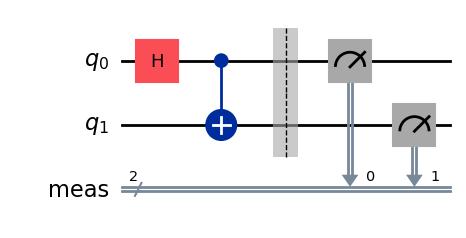

In [3]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0 ,1)
qc.measure_all()
qc.draw(output='mpl')

# Review the necessary quantum gates

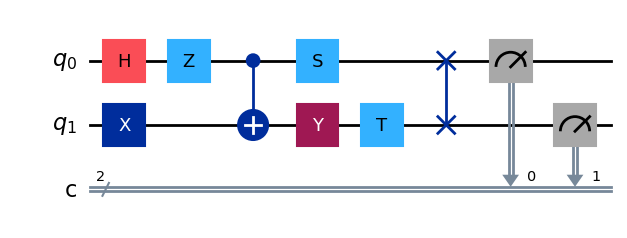

In [4]:
qc = QuantumCircuit(2, 2)

qc.h(0)        # Hadamard on qubit 0
qc.x(1)        # Pauli-X on qubit 1
qc.z(0)        # Pauli-Z on qubit 0
qc.cx(0, 1) 

qc.y(1)        # Pauli-Y on qubit 1
qc.s(0)        # S gate on qubit 0
qc.t(1)        # T gate on qubit 1
qc.swap(0, 1)  # SWAP qubits 0 and 1


qc.measure(0, 0)
qc.measure(1, 1)

qc.draw(output='mpl')  


# Classical Baseline Implementation

In [5]:
def search(lst, item):
    for i, val in enumerate(lst):
        if item == val:
            return i
        

def is_balanced_or_constant(f, n):
    first_result = f(0)
    count_diff = 0  

    for x in range(1, 2 ** n):
        if f(x) != first_result:
            count_diff += 1
        if count_diff > 0:
            break  

    return "constant" if count_diff == 0 else "balanced"


def constant(n):
    return 0

def balanced(n):
    return n

In [6]:
my_list = [1,2,3,4,5,51,11,23,2,3,2]

idx = search(my_list, 51)

print(idx)

5


In [7]:
print(is_balanced_or_constant(constant, 1)) 
print(is_balanced_or_constant(balanced, 1)) 

constant
balanced


# Quantum Implementation

# Deutsch's Josza Algorithm

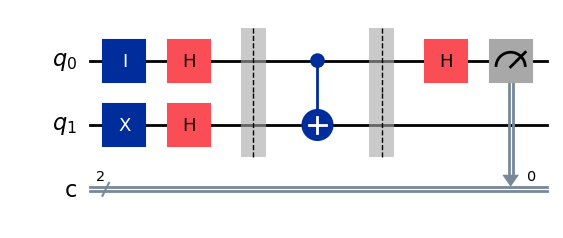

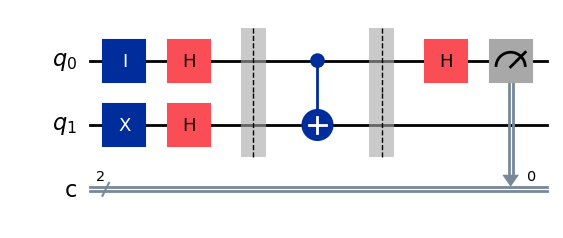

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.id(qreg_q[0])
circuit.x(qreg_q[1])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.barrier(qreg_q[1])
circuit.barrier(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.barrier(qreg_q[0])
circuit.barrier(qreg_q[1])
circuit.h(qreg_q[0])
# circuit.h(qreg_q[1])
circuit.measure(qreg_q[0], creg_c[0])
# The result of q[0] determines the nature of the function
circuit.draw("mpl")

Measurement Results: {'01': 1024}


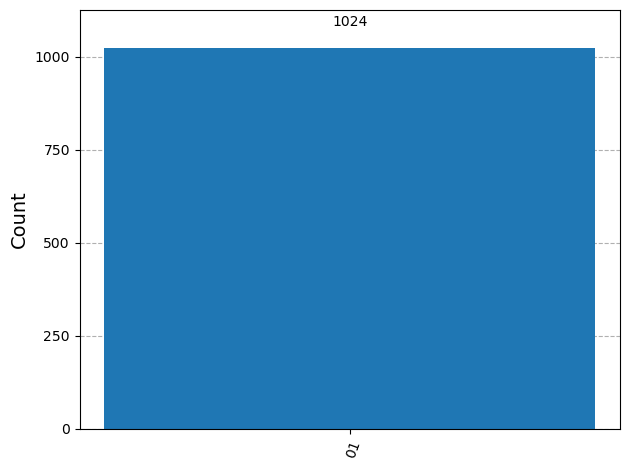

In [46]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
#%matplotlib notebook
# Use AerSimulator
simulator = AerSimulator()
#circuit = circuit.copy()  # ensure circuit is not bound to any session
#circuit = circuit.decompose()  # make sure all gates are compatible

# Run simulation
result = simulator.run(circuit, shots=1024).result()
counts = result.get_counts()

# Show results
print("Measurement Results:", counts)
plt.close()
fig = plot_histogram([counts])
#plot_histogram(counts)
plt.show()
# fig.savefig("result.png")

# img = mpimg.imread("result.png")
# plt.imshow(img) # Display the image data

In [44]:
# Analyze results
if len(counts) == 1 and '00' in list(counts.keys())[0][-2:]:
    print("The function is constant.")
else:
    print("The function is balanced.")


The function is balanced.
